# <center>Laboratorium 11<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [2]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z metodami całkowania numerycznego funkcji:  
$$
\int\limits_{a}^{b}f(x)dx 
$$  

Dana jest funkcja $f(x)$, należy wyznaczyć wartość całki tej funkcji na przedziale $a$,$b$.


***Zadanie 1.***    
Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\log(1+\tan(x))dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=\cfrac{\pi}{4}$ przy pomocy następujących metod:  
    1. Metoda Trapezów - [trapz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html#scipy.integrate.trapz)
    2. Metoda Simpsona - [simps](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps) 
    3. Metoda Romberga - [romb](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romb.html#scipy.integrate.romb)  
  
Sprawdź jak wyniki róźnią się od siebie, czy ma na nie wpływ długość wektora $\mathbf{y}$ oraz wartość parametru $dx$

3. Porównaj wyniki i czas obliczeń z punktu 1 z funkcjami:
    1. [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy-integrate-quad)
    2. [romberg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html#scipy.integrate.romberg)
    3. [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

Odpowiedź (1): 
Całkowanie podanej funkcji na dowolnym przedziale nie jest możliwe, ponieważ funkcja w całej swojej dziedzinie nie jest ciągła. Jednak podany przedział w zadaniu spełnia nasze warunki. 

C:\Users\kocha\AppData\Local\Temp/ipykernel_14580/3097419870.py:1: RuntimeWarning: invalid value encountered in log
  f1 = lambda x: np.log(1+np.tan(x))


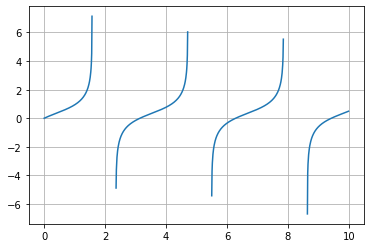

In [93]:
f1 = lambda x: np.log(1+np.tan(x))
x1 = np.arange(0, 10, 0.01)

plt.plot(x1, f1(x1))
plt.grid()
plt.show()

In [37]:
#Metoda trapezów
from scipy import integrate

dx = [0.5, 0.3, 0.1, 0.01, 0.001]

for j in dx:
    x = np.arange(0, np.pi/4, j)
    z = sp.integrate.trapz(f1(x), x)
    print(f'Wynik dla dx = {j} -> {z}')

Wynik dla dx = 0.5 -> 0.10896664767311852
Wynik dla dx = 0.3 -> 0.15904407163030085
Wynik dla dx = 0.1 -> 0.2164958063673104
Wynik dla dx = 0.01 -> 0.26847103905557407
Wynik dla dx = 0.001 -> 0.27192235467498227


In [36]:
#Metoda simpsona
for i in dx:
    x = np.arange(0, np.pi/4, i)
    k = integrate.simpson(f1(x), x)
    print(f'Wynik dla dx = {i} -> {k}')

Wynik dla dx = 0.5 -> 0.10896664767311852
Wynik dla dx = 0.3 -> 0.15993344691091152
Wynik dla dx = 0.1 -> 0.2165446317805566
Wynik dla dx = 0.01 -> 0.26847108355246846
Wynik dla dx = 0.001 -> 0.27192235470806986


In [55]:
#Metoda Romberga
for dx in range(0, 7):
    x = np.linspace(0, np.pi/4, 2**dx + 1)
    kappa = sp.integrate.romb(f1(x), dx=np.pi/4/(2**dx + 1))
    print(f'Wynika dla y = {2**dx+1} -> {kappa}')

Wynika dla y = 2 -> 0.13609913064397514
Wynika dla y = 3 -> 0.18146550752530016
Wynika dla y = 5 -> 0.2177586090303602
Wynika dla y = 9 -> 0.2419540100337336
Wynika dla y = 17 -> 0.2561865988592473
Wynika dla y = 33 -> 0.26394982912770937
Wynika dla y = 65 -> 0.2680105957296741


Dla metody trapezów i Simpsona możemy zauważyć, że im mniejsza wartość parametru dx tym wynik jest dokładniejszy. Tak samo w metodzie Romberga im dłuższy wektor y tym wynik jest dokładniejszy. Także ostateczny wynik policzonej całki zależy od tych parametrów. 

In [75]:
#Integrate.quad wynik i błąd
print(integrate.quad(f1, 0, np.pi/4))

%timeit integrate.quad(f1, 0, np.pi/4)

(0.27219826128795027, 3.022007769448168e-15)
111 µs ± 21.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [76]:
#Romberg wynik
result = integrate.romberg(f1, 0, np.pi/4)
print(result)

%timeit integrate.romberg(f1, 0, np.pi/4)

0.27219826128795016
47.3 µs ± 5.39 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [77]:
#Quadrature wynik i błąd
print(integrate.quadrature(f1, 0, np.pi/4))

%timeit integrate.quadrature(f1, 0, np.pi/4)

(0.27219826128795027, 5.551115123125783e-17)
71.3 µs ± 17.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Możemy zauważyć, że wszystkie 3 funkcje zwwróciły zbliżony wynik. Jest on stosunkowo bliski najdokładniejszym wynikom z porzedniego podpunktu stąd możemy przypuszczać, że obliczenia zostały wykonane poprawne. Co da czasu to najszybciej wykonuje się funkcja romberga, jednak najbardziej dokładna jest metoda quadrature.

***Zadanie 2.***  
Dla funkcji 

$$f(x) = e^{x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 1.

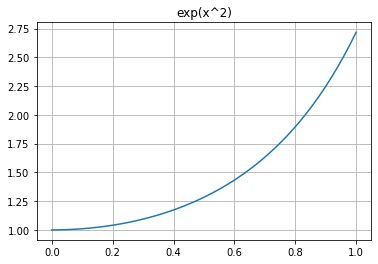

In [87]:
f2 = lambda x: np.exp(x**2)
x = np.linspace(0, 1)

plt.plot(x, f2(x))
plt.grid()
plt.title("exp(x^2)")
plt.show()

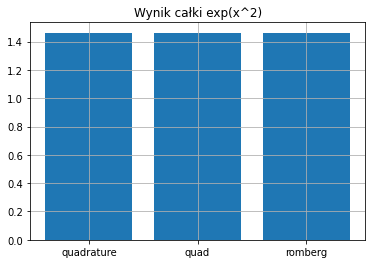

Wynik quad: 1.4626517459071815


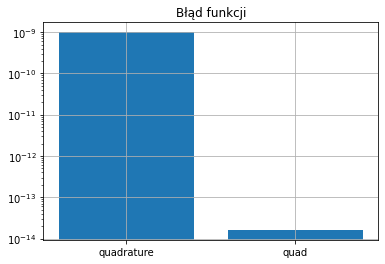

In [120]:
quadrature, quadrature_err = integrate.quadrature(f2, 0, 1)
quad, quad_err = integrate.quad(f2, 0, 1)
romberg = integrate.romberg(f2, 0, 1)

labels = ['quadrature', 'quad', 'romberg']
values = [quadrature, quad, romberg]

lbl = ['quadrature', 'quad']
vls = [quadrature_err, quad_err]

plt.bar(labels, values)
plt.grid()
plt.title('Wynik całki exp(x^2)')
plt.show()

print(f'Wynik quad: {quad}')

plt.bar(lbl, vls)
plt.grid()
plt.yscale('log')
plt.title('Błąd funkcji')
plt.show()